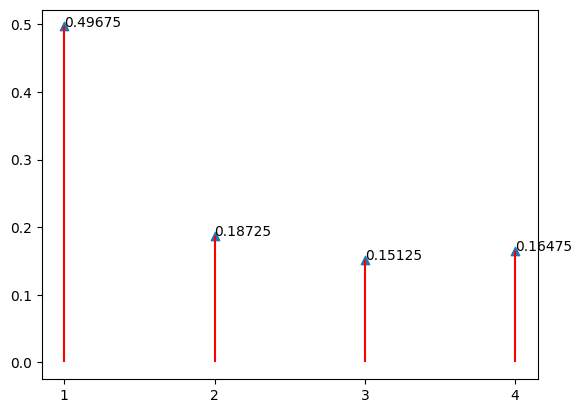

In [37]:
import numpy as np 
import matplotlib.pyplot as plt

fdp_2 = [0.49675, 0.18725, 0.15125, 0.16475]
plt.vlines(np.arange(1,5), 0, fdp_2, linestyle='-', color='red', alpha=1)
plt.scatter(np.arange(1,5),fdp_2,marker='^')
for x, y in zip(np.arange(1,5), fdp_2):
    plt.text(x, y, str(y), ha='left')
plt.xticks(ticks=[1,2,3,4])
plt.show()

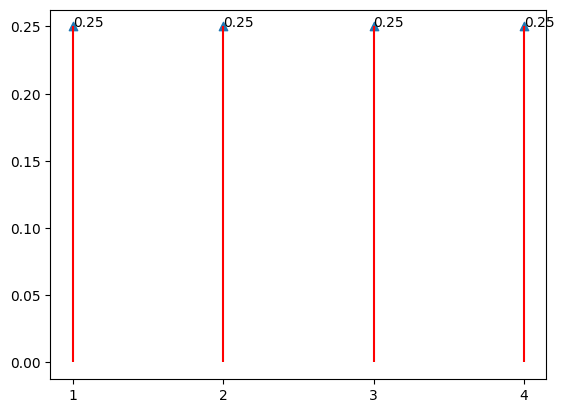

In [36]:
fdp_1 = [0.25,0.25,0.25,0.25]
plt.vlines(np.arange(1,5), 0, fdp_1, linestyle='-', color='red', alpha=1)
plt.scatter(np.arange(1,5),fdp_1,marker='^')
for x, y in zip(np.arange(1,5), fdp_1):
    plt.text(x, y, str(y), ha='left')
plt.xticks(ticks=[1,2,3,4])
plt.show()

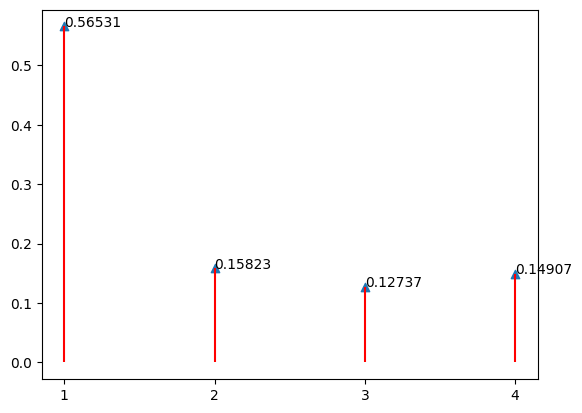

In [40]:
fdp_3 = [0.56531, 0.15823, 0.12737, 0.14907]
plt.vlines(np.arange(1,5), 0, fdp_3, linestyle='-', color='red', alpha=1)
plt.scatter(np.arange(1,5),fdp_3,marker='^')
for x, y in zip(np.arange(1,5), fdp_3):
    plt.text(x, y, str(y), ha='left')
plt.xticks(ticks=[1,2,3,4])
plt.show()